In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from prophet import Prophet
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric

import warnings
warnings.filterwarnings("ignore")

plt.style.use('ggplot')
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('milho-cepea_RS.csv')

In [3]:
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')

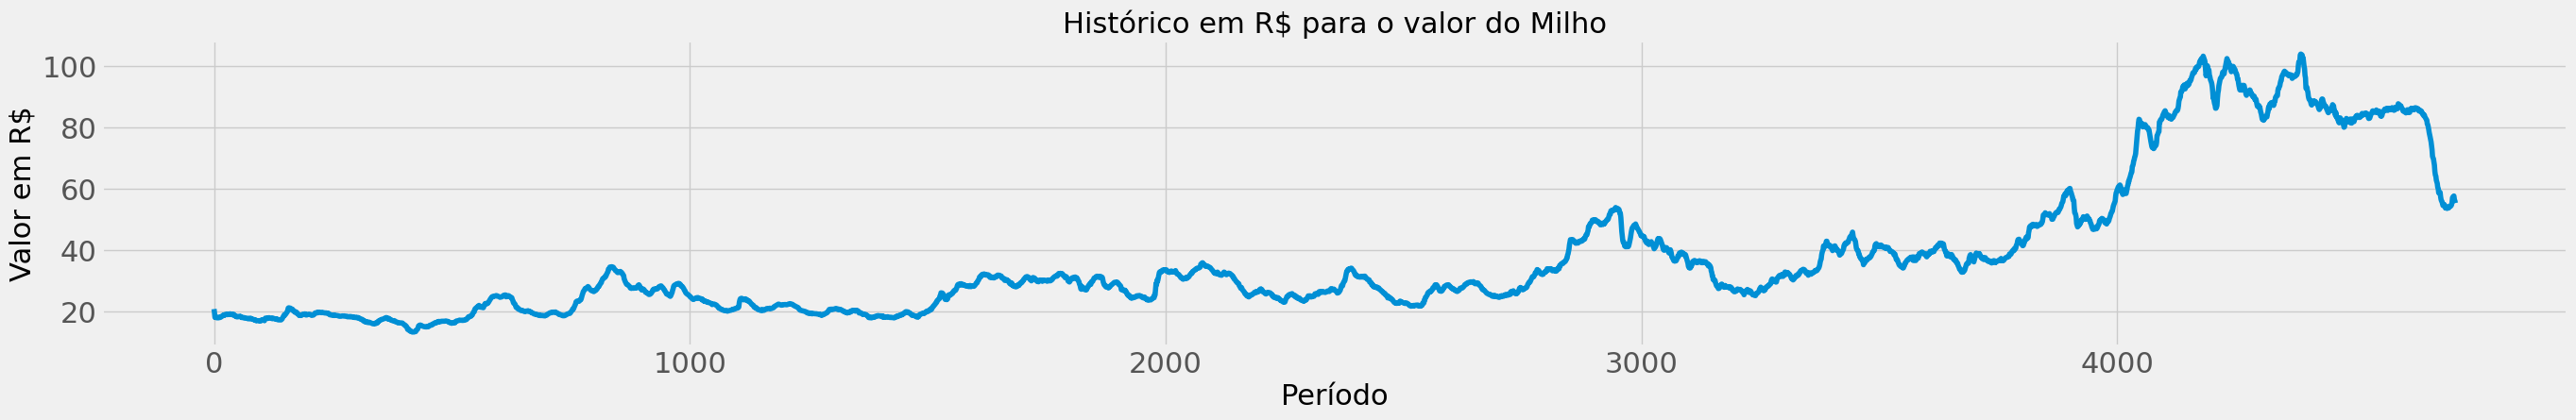

In [4]:
plt.figure(figsize=(30,4))
plt.plot(df.RS)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.xlabel('Período',size=22)
plt.ylabel('Valor em R$',size=22)
plt.title('Histórico em R$ para o valor do Milho',size=22)

plt.show()

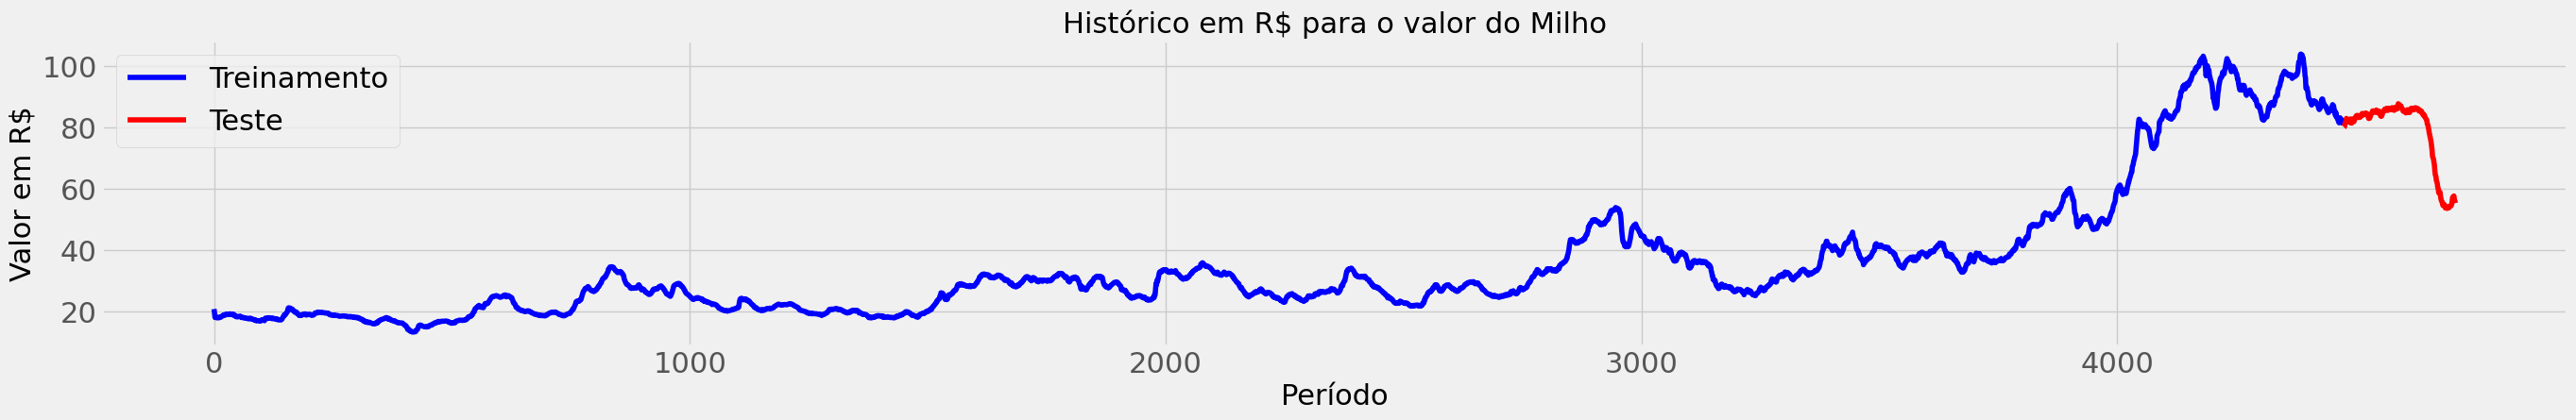

In [5]:
split_date = df.index[-int(0.05*len(df))]

# Dividir o DataFrame em conjuntos de treinamento e teste
train_df = df[df.index < split_date]
test_df = df[df.index >= split_date]

# Plotagem do histórico em R$ para o valor do Milho
plt.figure(figsize=(30, 4))
plt.plot(train_df['RS'], label='Treinamento', color='b')
plt.plot(test_df['RS'], label='Teste', color='r')
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.xlabel('Período', size=22)
plt.ylabel('Valor em R$', size=22)
plt.title('Histórico em R$ para o valor do Milho', size=22)
plt.legend(fontsize=22)
plt.show()

In [8]:
train_df.rename(columns={'date': 'ds'}, inplace=True)
train_df.rename(columns={'RS': 'y'}, inplace=True)

In [9]:
test_df.rename(columns={'date': 'ds'}, inplace=True)
test_df.rename(columns={'RS': 'y'}, inplace=True)

In [10]:
# Crie um modelo Prophet
model = Prophet()

# Ajuste o modelo aos dados de treinamento
model.fit(train_df)

# Configure a validação cruzada no conjunto de treinamento
df_cv = cross_validation(model, period='10 days', horizon='10 days')

# Calcule métricas de desempenho no conjunto de treinamento
df_metrics = performance_metrics(df_cv)

00:12:40 - cmdstanpy - INFO - Chain [1] start processing
00:12:41 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/640 [00:00<?, ?it/s]

00:12:43 - cmdstanpy - INFO - Chain [1] start processing
00:12:43 - cmdstanpy - INFO - Chain [1] done processing
00:12:43 - cmdstanpy - INFO - Chain [1] start processing
00:12:43 - cmdstanpy - INFO - Chain [1] done processing
00:12:43 - cmdstanpy - INFO - Chain [1] start processing
00:12:43 - cmdstanpy - INFO - Chain [1] done processing
00:12:44 - cmdstanpy - INFO - Chain [1] start processing
00:12:44 - cmdstanpy - INFO - Chain [1] done processing
00:12:44 - cmdstanpy - INFO - Chain [1] start processing
00:12:44 - cmdstanpy - INFO - Chain [1] done processing
00:12:44 - cmdstanpy - INFO - Chain [1] start processing
00:12:44 - cmdstanpy - INFO - Chain [1] done processing
00:12:44 - cmdstanpy - INFO - Chain [1] start processing
00:12:44 - cmdstanpy - INFO - Chain [1] done processing
00:12:44 - cmdstanpy - INFO - Chain [1] start processing
00:12:44 - cmdstanpy - INFO - Chain [1] done processing
00:12:44 - cmdstanpy - INFO - Chain [1] start processing
00:12:44 - cmdstanpy - INFO - Chain [1]

00:12:59 - cmdstanpy - INFO - Chain [1] done processing
00:12:59 - cmdstanpy - INFO - Chain [1] start processing
00:12:59 - cmdstanpy - INFO - Chain [1] done processing
00:13:00 - cmdstanpy - INFO - Chain [1] start processing
00:13:00 - cmdstanpy - INFO - Chain [1] done processing
00:13:00 - cmdstanpy - INFO - Chain [1] start processing
00:13:00 - cmdstanpy - INFO - Chain [1] done processing
00:13:00 - cmdstanpy - INFO - Chain [1] start processing
00:13:00 - cmdstanpy - INFO - Chain [1] done processing
00:13:00 - cmdstanpy - INFO - Chain [1] start processing
00:13:00 - cmdstanpy - INFO - Chain [1] done processing
00:13:01 - cmdstanpy - INFO - Chain [1] start processing
00:13:01 - cmdstanpy - INFO - Chain [1] done processing
00:13:01 - cmdstanpy - INFO - Chain [1] start processing
00:13:01 - cmdstanpy - INFO - Chain [1] done processing
00:13:01 - cmdstanpy - INFO - Chain [1] start processing
00:13:02 - cmdstanpy - INFO - Chain [1] done processing
00:13:02 - cmdstanpy - INFO - Chain [1] 

00:13:25 - cmdstanpy - INFO - Chain [1] done processing
00:13:25 - cmdstanpy - INFO - Chain [1] start processing
00:13:25 - cmdstanpy - INFO - Chain [1] done processing
00:13:26 - cmdstanpy - INFO - Chain [1] start processing
00:13:26 - cmdstanpy - INFO - Chain [1] done processing
00:13:26 - cmdstanpy - INFO - Chain [1] start processing
00:13:26 - cmdstanpy - INFO - Chain [1] done processing
00:13:26 - cmdstanpy - INFO - Chain [1] start processing
00:13:27 - cmdstanpy - INFO - Chain [1] done processing
00:13:27 - cmdstanpy - INFO - Chain [1] start processing
00:13:27 - cmdstanpy - INFO - Chain [1] done processing
00:13:27 - cmdstanpy - INFO - Chain [1] start processing
00:13:27 - cmdstanpy - INFO - Chain [1] done processing
00:13:28 - cmdstanpy - INFO - Chain [1] start processing
00:13:28 - cmdstanpy - INFO - Chain [1] done processing
00:13:28 - cmdstanpy - INFO - Chain [1] start processing
00:13:28 - cmdstanpy - INFO - Chain [1] done processing
00:13:28 - cmdstanpy - INFO - Chain [1] 

00:13:59 - cmdstanpy - INFO - Chain [1] done processing
00:13:59 - cmdstanpy - INFO - Chain [1] start processing
00:14:00 - cmdstanpy - INFO - Chain [1] done processing
00:14:00 - cmdstanpy - INFO - Chain [1] start processing
00:14:01 - cmdstanpy - INFO - Chain [1] done processing
00:14:01 - cmdstanpy - INFO - Chain [1] start processing
00:14:01 - cmdstanpy - INFO - Chain [1] done processing
00:14:01 - cmdstanpy - INFO - Chain [1] start processing
00:14:02 - cmdstanpy - INFO - Chain [1] done processing
00:14:02 - cmdstanpy - INFO - Chain [1] start processing
00:14:03 - cmdstanpy - INFO - Chain [1] done processing
00:14:03 - cmdstanpy - INFO - Chain [1] start processing
00:14:03 - cmdstanpy - INFO - Chain [1] done processing
00:14:03 - cmdstanpy - INFO - Chain [1] start processing
00:14:04 - cmdstanpy - INFO - Chain [1] done processing
00:14:04 - cmdstanpy - INFO - Chain [1] start processing
00:14:04 - cmdstanpy - INFO - Chain [1] done processing
00:14:04 - cmdstanpy - INFO - Chain [1] 

00:14:38 - cmdstanpy - INFO - Chain [1] done processing
00:14:38 - cmdstanpy - INFO - Chain [1] start processing
00:14:39 - cmdstanpy - INFO - Chain [1] done processing
00:14:39 - cmdstanpy - INFO - Chain [1] start processing
00:14:39 - cmdstanpy - INFO - Chain [1] done processing
00:14:39 - cmdstanpy - INFO - Chain [1] start processing
00:14:40 - cmdstanpy - INFO - Chain [1] done processing
00:14:40 - cmdstanpy - INFO - Chain [1] start processing
00:14:40 - cmdstanpy - INFO - Chain [1] done processing
00:14:41 - cmdstanpy - INFO - Chain [1] start processing
00:14:41 - cmdstanpy - INFO - Chain [1] done processing
00:14:41 - cmdstanpy - INFO - Chain [1] start processing
00:14:41 - cmdstanpy - INFO - Chain [1] done processing
00:14:41 - cmdstanpy - INFO - Chain [1] start processing
00:14:42 - cmdstanpy - INFO - Chain [1] done processing
00:14:42 - cmdstanpy - INFO - Chain [1] start processing
00:14:42 - cmdstanpy - INFO - Chain [1] done processing
00:14:42 - cmdstanpy - INFO - Chain [1] 

00:15:18 - cmdstanpy - INFO - Chain [1] done processing
00:15:18 - cmdstanpy - INFO - Chain [1] start processing
00:15:18 - cmdstanpy - INFO - Chain [1] done processing
00:15:19 - cmdstanpy - INFO - Chain [1] start processing
00:15:19 - cmdstanpy - INFO - Chain [1] done processing
00:15:19 - cmdstanpy - INFO - Chain [1] start processing
00:15:20 - cmdstanpy - INFO - Chain [1] done processing
00:15:20 - cmdstanpy - INFO - Chain [1] start processing
00:15:20 - cmdstanpy - INFO - Chain [1] done processing
00:15:21 - cmdstanpy - INFO - Chain [1] start processing
00:15:21 - cmdstanpy - INFO - Chain [1] done processing
00:15:21 - cmdstanpy - INFO - Chain [1] start processing
00:15:22 - cmdstanpy - INFO - Chain [1] done processing
00:15:22 - cmdstanpy - INFO - Chain [1] start processing
00:15:22 - cmdstanpy - INFO - Chain [1] done processing
00:15:22 - cmdstanpy - INFO - Chain [1] start processing
00:15:23 - cmdstanpy - INFO - Chain [1] done processing
00:15:23 - cmdstanpy - INFO - Chain [1] 

00:16:04 - cmdstanpy - INFO - Chain [1] done processing
00:16:05 - cmdstanpy - INFO - Chain [1] start processing
00:16:05 - cmdstanpy - INFO - Chain [1] done processing
00:16:05 - cmdstanpy - INFO - Chain [1] start processing
00:16:06 - cmdstanpy - INFO - Chain [1] done processing
00:16:06 - cmdstanpy - INFO - Chain [1] start processing
00:16:06 - cmdstanpy - INFO - Chain [1] done processing
00:16:07 - cmdstanpy - INFO - Chain [1] start processing
00:16:07 - cmdstanpy - INFO - Chain [1] done processing
00:16:07 - cmdstanpy - INFO - Chain [1] start processing
00:16:08 - cmdstanpy - INFO - Chain [1] done processing
00:16:08 - cmdstanpy - INFO - Chain [1] start processing
00:16:08 - cmdstanpy - INFO - Chain [1] done processing
00:16:09 - cmdstanpy - INFO - Chain [1] start processing
00:16:09 - cmdstanpy - INFO - Chain [1] done processing
00:16:09 - cmdstanpy - INFO - Chain [1] start processing
00:16:10 - cmdstanpy - INFO - Chain [1] done processing
00:16:10 - cmdstanpy - INFO - Chain [1] 

00:16:52 - cmdstanpy - INFO - Chain [1] done processing
00:16:52 - cmdstanpy - INFO - Chain [1] start processing
00:16:53 - cmdstanpy - INFO - Chain [1] done processing
00:16:53 - cmdstanpy - INFO - Chain [1] start processing
00:16:53 - cmdstanpy - INFO - Chain [1] done processing
00:16:54 - cmdstanpy - INFO - Chain [1] start processing
00:16:54 - cmdstanpy - INFO - Chain [1] done processing
00:16:54 - cmdstanpy - INFO - Chain [1] start processing
00:16:55 - cmdstanpy - INFO - Chain [1] done processing
00:16:55 - cmdstanpy - INFO - Chain [1] start processing
00:16:55 - cmdstanpy - INFO - Chain [1] done processing
00:16:56 - cmdstanpy - INFO - Chain [1] start processing
00:16:56 - cmdstanpy - INFO - Chain [1] done processing
00:16:56 - cmdstanpy - INFO - Chain [1] start processing
00:16:57 - cmdstanpy - INFO - Chain [1] done processing
00:16:57 - cmdstanpy - INFO - Chain [1] start processing
00:16:57 - cmdstanpy - INFO - Chain [1] done processing
00:16:58 - cmdstanpy - INFO - Chain [1] 

00:17:59 - cmdstanpy - INFO - Chain [1] done processing
00:17:59 - cmdstanpy - INFO - Chain [1] start processing
00:18:00 - cmdstanpy - INFO - Chain [1] done processing
00:18:00 - cmdstanpy - INFO - Chain [1] start processing
00:18:01 - cmdstanpy - INFO - Chain [1] done processing
00:18:01 - cmdstanpy - INFO - Chain [1] start processing
00:18:02 - cmdstanpy - INFO - Chain [1] done processing
00:18:02 - cmdstanpy - INFO - Chain [1] start processing
00:18:03 - cmdstanpy - INFO - Chain [1] done processing
00:18:03 - cmdstanpy - INFO - Chain [1] start processing
00:18:04 - cmdstanpy - INFO - Chain [1] done processing
00:18:04 - cmdstanpy - INFO - Chain [1] start processing
00:18:05 - cmdstanpy - INFO - Chain [1] done processing
00:18:05 - cmdstanpy - INFO - Chain [1] start processing
00:18:06 - cmdstanpy - INFO - Chain [1] done processing
00:18:06 - cmdstanpy - INFO - Chain [1] start processing
00:18:07 - cmdstanpy - INFO - Chain [1] done processing
00:18:07 - cmdstanpy - INFO - Chain [1] 

In [27]:
# Realize previsões no conjunto de teste
future = test_df.drop(columns=['y'])
forecast = model.predict(future)

<Axes: xlabel='ds'>

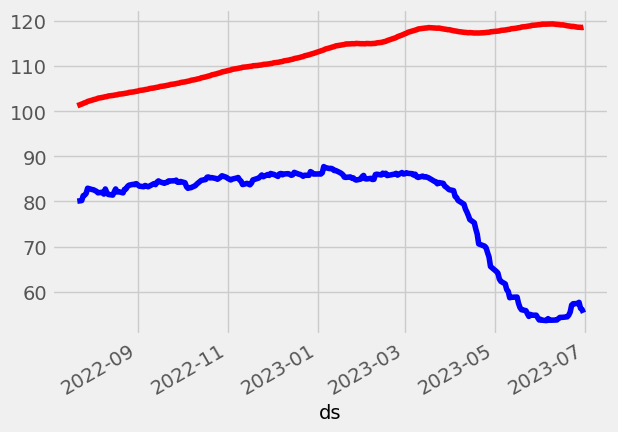

In [28]:
forecast.set_index('ds')['yhat'].plot(color='red')
test_df.set_index('ds')['y'].plot(color='blue')

In [29]:
df_cv

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2005-01-12,17.450542,17.300884,17.624043,17.75,2005-01-11
1,2005-01-13,17.177634,17.012444,17.348987,17.95,2005-01-11
2,2005-01-14,16.857371,16.695305,17.023897,18.02,2005-01-11
3,2005-01-17,15.258218,15.097208,15.419539,18.01,2005-01-11
4,2005-01-18,14.553270,14.397545,14.713363,17.97,2005-01-11
...,...,...,...,...,...,...
4359,2022-07-15,101.488458,95.150976,107.626698,82.46,2022-07-11
4360,2022-07-18,101.862878,95.757309,107.874654,82.36,2022-07-11
4361,2022-07-19,102.039340,95.546329,107.857069,81.67,2022-07-11
4362,2022-07-20,102.167592,95.682168,108.610895,81.41,2022-07-11


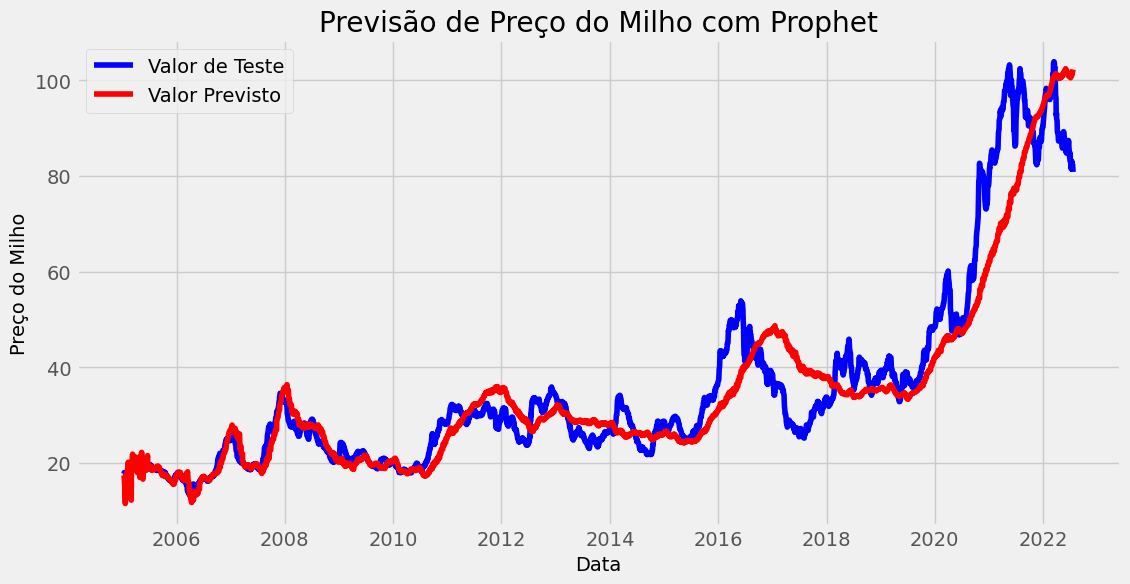

In [30]:
# Plote o valor previsto com o valor de teste
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(111)
ax1.plot(df_cv['ds'], df_cv['y'], label='Valor de Teste', color='b')
ax1.plot(df_cv['ds'], df_cv['yhat'], label='Valor Previsto', color='r')
ax1.set_xlabel('Data')
ax1.set_ylabel('Preço do Milho')
plt.legend(loc='best')
plt.title('Previsão de Preço do Milho com Prophet')
plt.show()

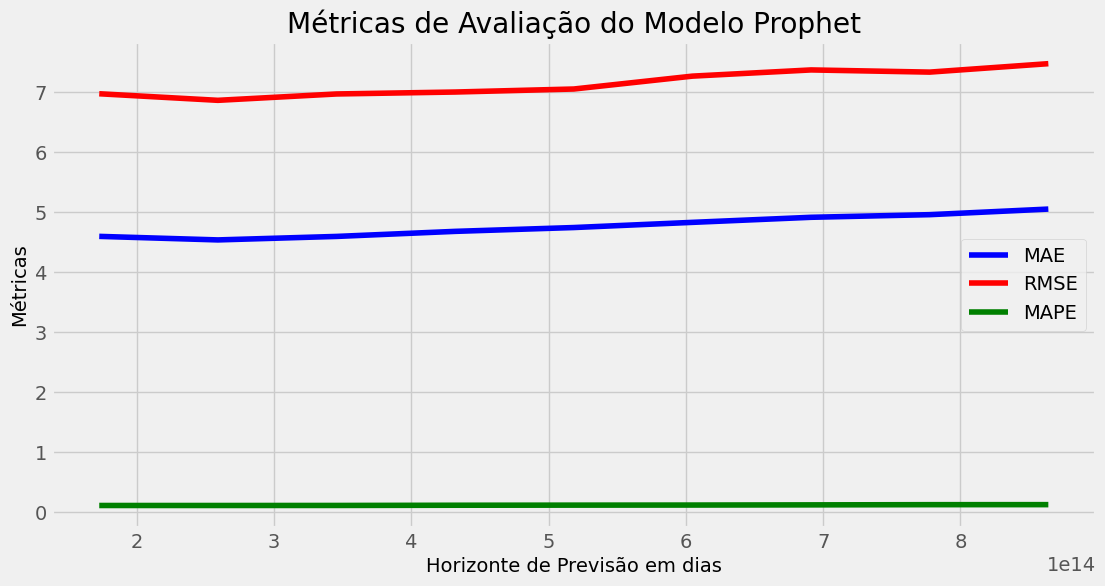

In [31]:
# Calcule métricas de desempenho
#df_metrics = performance_metrics(df_cv)

# Plote as métricas de avaliação
fig = plt.figure(figsize=(12, 6))
ax2 = fig.add_subplot(111)
ax2.plot(df_metrics['horizon'], df_metrics['mae'], label='MAE', color='b')
ax2.plot(df_metrics['horizon'], df_metrics['rmse'], label='RMSE', color='r')
ax2.plot(df_metrics['horizon'], df_metrics['mape'], label='MAPE', color='g')
ax2.set_xlabel('Horizonte de Previsão em dias')
ax2.set_ylabel('Métricas')
plt.legend(loc='best')
plt.title('Métricas de Avaliação do Modelo Prophet')
plt.show()

In [20]:
df_metrics

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,2 days,48.655769,6.975369,4.599207,0.115393,0.094339,0.114849,0.400000
1,3 days,47.140422,6.865888,4.540164,0.115306,0.092730,0.114858,0.375286
2,4 days,48.606583,6.971842,4.598293,0.115974,0.093073,0.115432,0.389522
3,5 days,49.058655,7.004188,4.682638,0.119410,0.095765,0.118722,0.388895
4,6 days,49.763970,7.054358,4.746345,0.121222,0.097832,0.120726,0.346713
5,7 days,52.839258,7.269062,4.832682,0.122601,0.095313,0.122378,0.379863
6,8 days,54.351066,7.372318,4.917087,0.125668,0.100891,0.125549,0.352403
7,9 days,53.818011,7.336076,4.960911,0.129007,0.107953,0.128247,0.333333
8,10 days,55.899695,7.476610,5.053949,0.129558,0.111589,0.129454,0.344037
